# Loading libraries

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

# Loading data

In [2]:
# Loading raw data

#reds = pd.read_csv('.\static\data\wineQualityReds.csv')
#reds['type'] = 'red'

#whites = pd.read_csv('.\static\data\wineQualityWhites.csv')
#whites['type'] = 'white'

#data = reds.append(whites)
#data = data.drop('Unnamed: 0',1)

#data.to_csv('.\static\data\wineQuality.csv', header=True, index=None)

data = pd.read_csv('.\static\data\wineQualityReds.csv')
data = data.drop('Unnamed: 0',1)

# Data analysis

In [3]:
# Finding correlations between features 
# The higher the values, the stronger the relationships are
# It means when one feature increases, the other one tends to increase as well and vice-versa
correlations = data.corr()['quality'].drop('quality')
correlations.sort_values(ascending = False)

alcohol                 0.476166
sulphates               0.251397
citric.acid             0.226373
fixed.acidity           0.124052
residual.sugar          0.013732
free.sulfur.dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total.sulfur.dioxide   -0.185100
volatile.acidity       -0.390558
Name: quality, dtype: float64

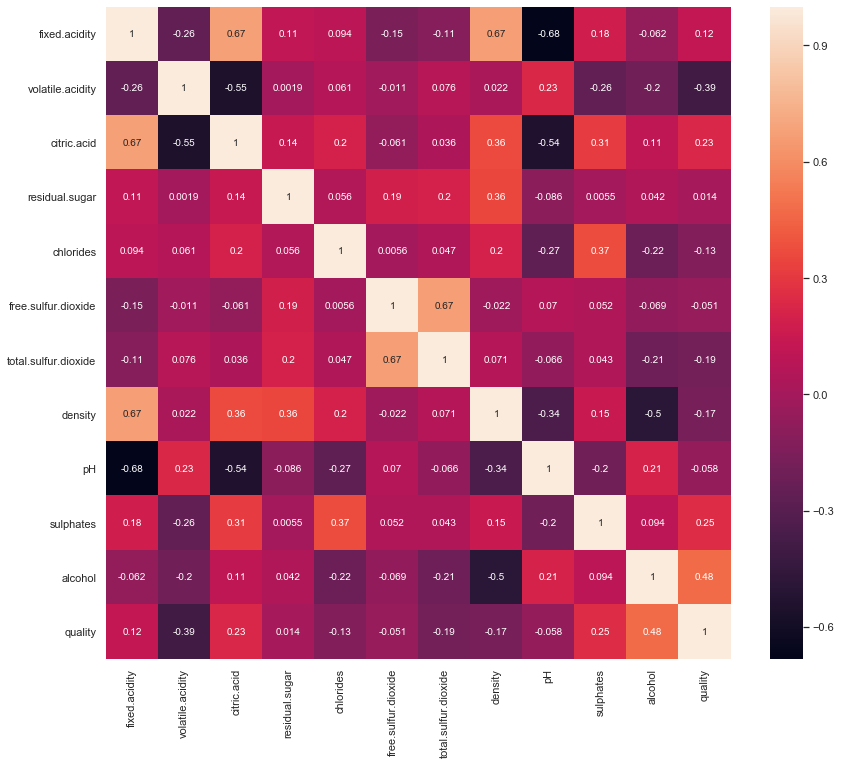

In [4]:
# Visualizing correlations
plt.figure(figsize = (14,12))
sns.heatmap(data.corr(), annot=True, linewidths=0)
plt.show()

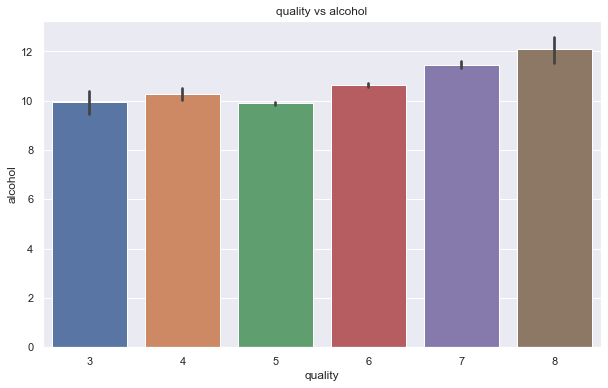

In [5]:
# Quality vs Alcohol
plt.figure(figsize = (10,6))
plt.title('quality vs alcohol')
sns.barplot(x = data['quality'], y = data['alcohol'], data = data)

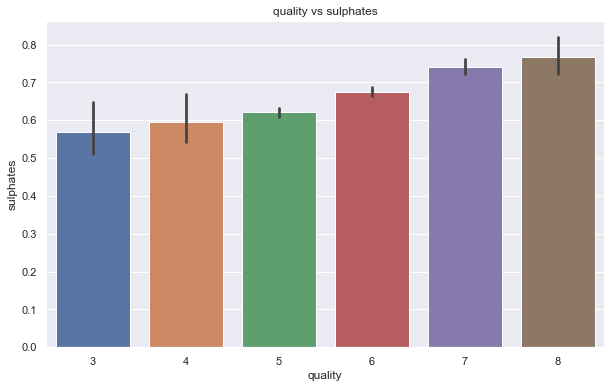

In [6]:
# Quality vs Sulphates
plt.figure(figsize = (10,6))
plt.title('quality vs sulphates')
sns.barplot(x = data['quality'], y = data['sulphates'], data = data)

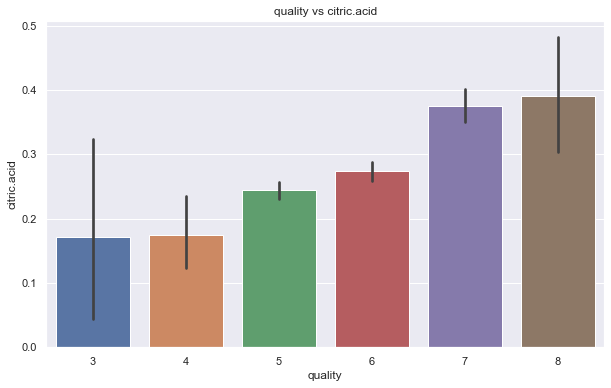

In [7]:
# Quality vs Citric Acid
plt.figure(figsize = (10,6))
plt.title('quality vs citric.acid')
sns.barplot(x = data['quality'], y = data['citric.acid'], data = data)

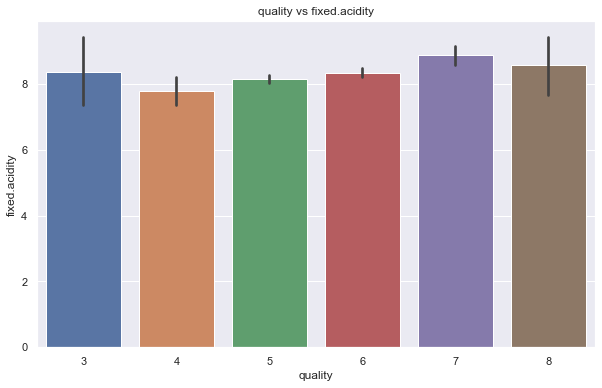

In [8]:
# Quality vs Fixed Acidity
plt.figure(figsize = (10,6))
plt.title('quality vs fixed.acidity')
sns.barplot(x = data['quality'], y = data['fixed.acidity'], data = data)

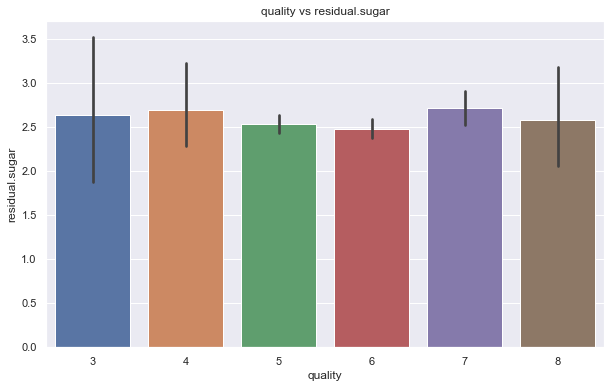

In [9]:
# Quality vs Residual Sugar
plt.figure(figsize = (10,6))
plt.title('quality vs residual.sugar')
sns.barplot(x = data['quality'], y = data['residual.sugar'], data = data)

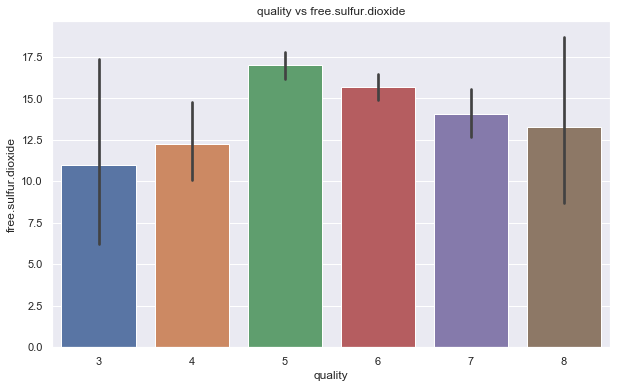

In [10]:
# Quality vs Free Sulfur Dioxide
plt.figure(figsize = (10,6))
plt.title('quality vs free.sulfur.dioxide')
sns.barplot(x = data['quality'], y = data['free.sulfur.dioxide'], data = data)

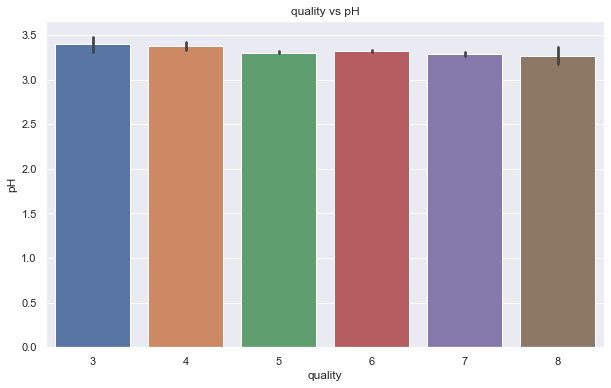

In [11]:
# Quality vs pH
plt.figure(figsize = (10,6))
plt.title('quality vs pH')
sns.barplot(x = data['quality'], y = data['pH'], data = data)

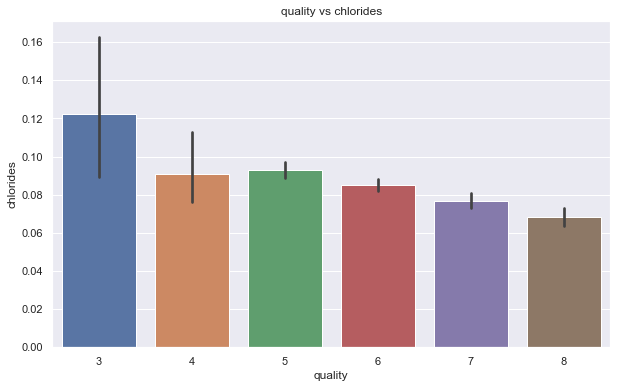

In [12]:
# Quality vs Chlorides
plt.figure(figsize = (10,6))
plt.title('quality vs chlorides')
sns.barplot(x = data['quality'], y = data['chlorides'], data = data)

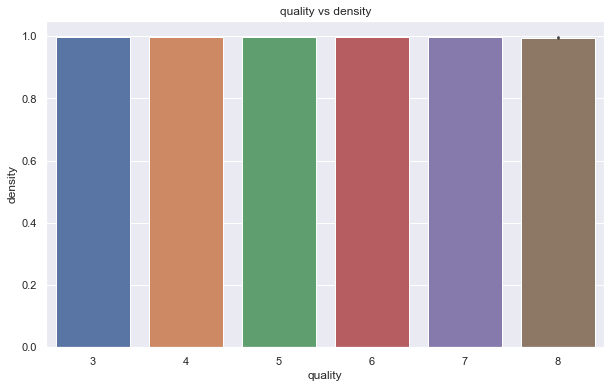

In [13]:
# Quality vs Density
plt.figure(figsize = (10,6))
plt.title('quality vs density')
sns.barplot(x = data['quality'], y = data['density'], data = data)

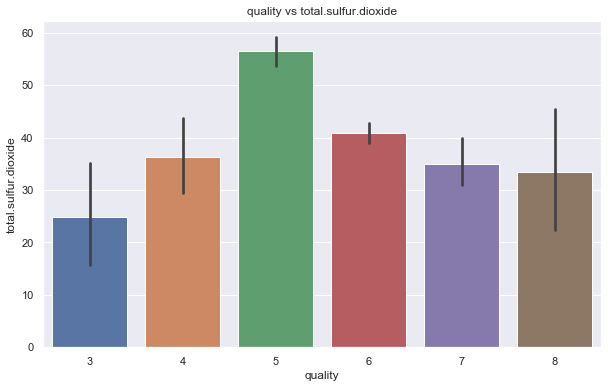

In [14]:
# Quality vs Total Sulfur Dioxide
plt.figure(figsize = (10,6))
plt.title('quality vs total.sulfur.dioxide')
sns.barplot(x = data['quality'], y = data['total.sulfur.dioxide'], data = data)

# Dataset

In [15]:
# Define dependent and independent variables
# Taking features with correlation greater than 0.05 as input x and quality as target variable y 
x = data[['alcohol','sulphates','citric.acid','fixed.acidity','residual.sugar','free.sulfur.dioxide','pH','chlorides','density','total.sulfur.dioxide','volatile.acidity']]
y = data['quality']

# Train, test, split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape

((1279, 11), (320, 11))

In [17]:
y_train.shape, y_test.shape

((1279,), (320,))

# Regression

In [18]:
# Fitting linear regression to training data
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Coefficients  
reg.coef_

array([ 2.81889567e-01,  8.41171623e-01, -1.40821461e-01,  2.30853339e-02,
        6.56431104e-03,  5.62733439e-03, -3.93687732e-01, -1.80650315e+00,
       -1.03515936e+01, -3.64444893e-03, -1.00130443e+00])

In [20]:
# Intercepts
reg.intercept_.round(3)

14.355

In [21]:
# R-squared
reg.score(x_train, y_train).round(3)

0.348

In [22]:
# Adjusted R-squared
r2 = reg.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2.round(3)

0.342

# Predictions

In [23]:
reg.predict(x_test)

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032,
       6.13959677, 5.23386892, 5.54991474, 5.25825299, 5.44810502,
       6.46828999, 5.15018088, 5.59105157, 6.5560658 , 5.32255751,
       5.3918385 , 5.19610791, 5.94475739, 6.36197631, 5.35484893,
       5.41907575, 6.36483321, 5.35121573, 5.172392  , 6.16987311,
       5.25263058, 5.50657406, 5.75422105, 5.39101712, 5.45331031,
       5.02757499, 6.16173243, 5.68661555, 5.6486077 , 6.165471  ,
       5.52872593, 5.24414488, 6.17724727, 5.16500868, 5.87598332,
       5.81317121, 6.41982782, 5.6059474 , 5.15232137, 5.55634632,
       5.16044852, 5.10449459, 5.58371721, 6.33425313, 4.95134985,
       4.98364804, 6.01041999, 5.40809804, 5.83802638, 5.2486897 ,
       5.60717482, 5.96630957, 5.27619063, 5.30380113, 6.4949309 ,
       5.42033967, 6.34273471, 5.24618531, 6.41317317, 5.31237924,
       6.41746963, 4.74315748, 5.79362039, 5.8283184 , 6.17598

# Feature selection

In [24]:
f_regression(x_train, y_train)

(array([3.67395573e+02, 7.98550176e+01, 6.25656209e+01, 1.94511271e+01,
        3.75851042e-02, 3.99718978e+00, 2.61252999e+00, 2.07807765e+01,
        3.66771046e+01, 5.32453046e+01, 2.13369300e+02]),
 array([3.59657867e-72, 1.37685526e-18, 5.54342171e-15, 1.11886213e-05,
        8.46309462e-01, 4.57877737e-02, 1.06269489e-01, 5.64353434e-06,
        1.83059961e-09, 5.15544701e-13, 8.38623251e-45]))

In [25]:
p_values = f_regression(x_train, y_train)[1]
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.846, 0.046, 0.106, 0.   , 0.   ,
       0.   , 0.   ])

In [26]:
reg_summary = pd.DataFrame(data = x_train.columns.values, columns=['feature'])
reg_summary['coefficient'] = reg.coef_.round(3)
reg_summary['p-values'] = p_values.round(3)
reg_summary

,feature,coefficient,p-values
0,alcohol,0.282,0.000
1,sulphates,0.841,0.000
2,citric.acid,-0.141,0.000
3,fixed.acidity,0.023,0.000
4,residual.sugar,0.007,0.846
5,free.sulfur.dioxide,0.006,0.046
6,pH,-0.394,0.106
7,chlorides,-1.807,0.000
8,density,-10.352,0.000
9,total.sulfur.dioxide,-0.004,0.000


# Feature scaling through Standardization

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled

array([[ 1.12317723,  0.45822284,  0.19209222, ...,  1.84669643,
         1.04293362,  0.88971201],
       [ 1.40827174, -0.40119696,  0.65275338, ..., -3.00449133,
         3.59387025, -1.78878251],
       [-0.58738978,  0.51551749,  1.01104539, ...,  0.76865471,
        -0.99174203, -0.78434707],
       ...,
       [-0.87248428, -0.68767023, -1.08752211, ...,  0.36977927,
         1.16440679,  0.49909822],
       [ 1.40827174,  0.80199076,  0.39683051, ..., -1.18260081,
        -0.96137374, -1.84458448],
       [ 2.92877575, -0.68767023, -0.06383064, ..., -2.84278507,
        -1.08284691, -1.34236676]])

In [30]:
scaler.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[-0.75508835,  0.0634928 , -0.96313679, ...,  0.23074469,
         0.00884052,  0.24258119],
       [-0.84471308, -1.15964614, -0.49458376, ..., -0.31812766,
         1.72151211, -0.09492307],
       [-0.48621416,  2.23796204, -0.23427652, ...,  1.87736173,
        -0.35816054,  0.86133899],
       ...,
       [-0.57583889, -0.81988533, -0.07809217, ..., -0.23829168,
        -0.23582685,  0.46758403],
       [ 0.67890733,  0.26734929,  0.6507681 , ..., -0.58757408,
        -0.57224448, -1.3886894 ],
       [-0.66546362, -0.75193316, -1.17138258, ...,  0.67982206,
        -0.96982896,  1.39572074]])

# Regression with scaled features

In [32]:
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
reg_summary = pd.DataFrame([['intercept'],['alcohol'],['sulphates'],['citric.acid'],['fixed.acidity'],['residual.sugar'],['free.sulfur.dioxide'],['pH'],['chlorides'],['density'],['total.sulfur.dioxide'],['volatile.acidity']], columns=['feature'])
reg_summary['weight'] = reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7], reg.coef_[8], reg.coef_[9], reg.coef_[10]
reg_summary

,feature,weight
0,intercept,5.623925
1,alcohol,0.296628
2,sulphates,0.146815
3,citric.acid,-0.027512
4,fixed.acidity,0.039789
5,residual.sugar,0.009421
6,free.sulfur.dioxide,0.058015
7,pH,-0.060610
8,chlorides,-0.089084
9,density,-0.019204


# Predictions with standardized coefficients

In [34]:
reg.predict(x_test_scaled)

array([5.31604945, 5.01510456, 5.68127734, 5.42850337, 5.69164445,
       5.24334899, 5.00005089, 5.07336691, 5.76075607, 5.66582592,
       6.07737057, 5.21963144, 5.54618858, 5.24281413, 5.42689969,
       6.40764925, 5.10642483, 5.56389126, 6.55634458, 5.32781197,
       5.32155037, 5.18606632, 5.8931055 , 6.30148969, 5.33279373,
       5.43257911, 6.33070482, 5.3076262 , 5.17748578, 6.19154899,
       5.22213144, 5.45658591, 5.7577219 , 5.36183832, 5.45062475,
       4.99428909, 6.16712124, 5.6926719 , 5.61976103, 6.11944753,
       5.50931028, 5.21590148, 6.18227967, 5.14665681, 5.88729797,
       5.84005214, 6.45367167, 5.60532282, 5.10424797, 5.53176658,
       5.19220769, 4.96207916, 5.53005331, 6.33877243, 4.93841224,
       4.9672789 , 6.00389345, 5.39481548, 5.79772473, 5.23790835,
       5.57904953, 5.93851115, 5.25124515, 5.2864384 , 6.45268358,
       5.39491056, 6.29774203, 5.2559574 , 6.41541504, 5.29541354,
       6.35315486, 4.72046593, 5.81225746, 5.77575218, 6.12855